# Numerische Lösung von Differentialgleichungen

### https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp #nummerische Paket

## Windwiderstand
$$\frac{dv(t)}{dt}=-\gamma v(t)^2$$

In [3]:
def f(t,v):
    gamma = 0.1
    dv = -gamma*v**2
    return dv

In [4]:
'''
Wir benutzen 2 Methoden um die Differentialgleichung für die Abnahme der Geschwindigkeit 
durch den Windwiderstand zu berechnen. Einmal die Euler-Vorwärts Mehtode und zum anderen
die scipy Biblitheksroutine solve_ivp
'''
#
# Euler Vorwärts
t0 = 0.
t_max = 10.
n = 101
t = np.array([0.])
dt = (t_max-t0)/(n-1) # das Intervall ist dt=0.1 fuer n=101 Punkte und t_max=10
#
v1 = np.zeros(n)
v1[0] = 1. #muss array sein !! auch bei einzelen Zahl
#Zum neuen Zeitpunkt t+dt , EUler Vorwärtsintegration
for i in np.arange(1,n):
    v1[i] = v1[i-1]+f(t,v1[i-1])*dt
    t
#
# Scipy Bibliotheksroutine solve_ivp
vsc0 = [1.0]
t_eval = np.linspace(0,(n-1)*dt,n)
t_span = [t0,t_max]
sol = solve_ivp(f,t_span,vsc0,t_eval=t_eval)

<IPython.core.display.Javascript object>


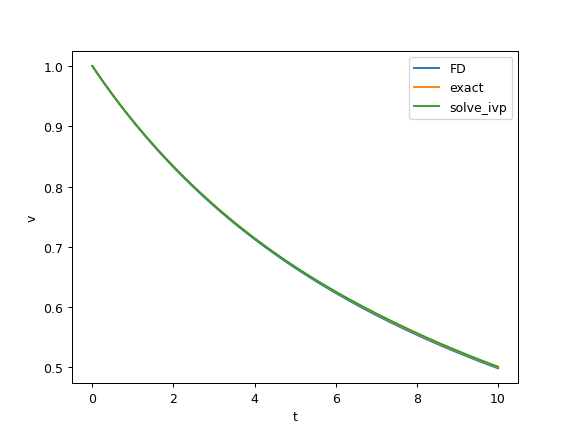

In [6]:
%matplotlib notebook
fig,ax = plt.subplots()
#
t = t_eval
v2 = 1./(0.1*t+1.)
v3 = sol.y[0]
#
ax.set_xlabel('t')
ax.set_ylabel('v')
ax.plot(t, v1, label = 'FD')
ax.plot(t, v2, label = 'exact')
ax.plot(t, v3, label = 'solve_ivp')
ax.legend()